In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('datasets/KNN_Project_Data')

In [3]:
df.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X=df.drop('TARGET CLASS',axis=1)

In [14]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled=scaler.transform(X)

In [16]:
scaled

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [20]:
df_feat=pd.DataFrame(scaled,columns=X[:-1].columns)

In [21]:
df_feat.head(2)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546


In [22]:
from sklearn.cross_validation import train_test_split

In [24]:
X=df_feat
y=df['TARGET CLASS']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
predictions=knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test,predictions),'\nConfusion Matrix: \n',
     confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.71      0.71       162
          1       0.72      0.71      0.72       168

avg / total       0.71      0.71      0.71       330
 
Confusion Matrix: 
 [[115  47]
 [ 48 120]]


In [34]:
error_rate=[]

for i in range(1,40):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    pred_i=knn1.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error rate')

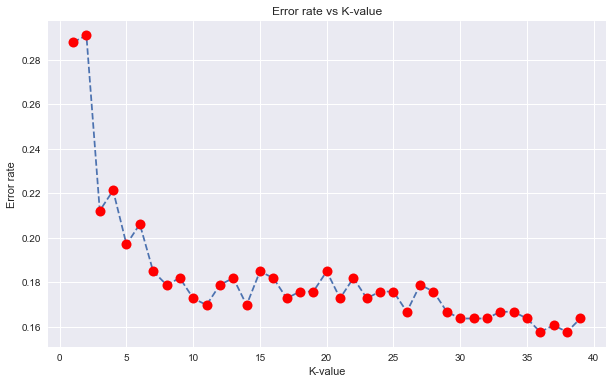

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle='--',marker='o',
        markerfacecolor='r',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K-value')
plt.ylabel('Error rate')

In [36]:
knn36=KNeighborsClassifier(n_neighbors=36)
knn36.fit(X_train,y_train)
pred_36=knn36.predict(X_test)

In [39]:
knn30=KNeighborsClassifier(n_neighbors=30)
knn30.fit(X_train,y_train)
pred_30=knn30.predict(X_test)
print('For k=30,\n',classification_report(y_test,pred_30),'\nConfusion Matrix: \n',
     confusion_matrix(y_test,pred_30))

For k=30,
              precision    recall  f1-score   support

          0       0.83      0.83      0.83       162
          1       0.84      0.84      0.84       168

avg / total       0.84      0.84      0.84       330
 
Confusion Matrix: 
 [[135  27]
 [ 27 141]]


In [38]:
print('For k=36,\n',classification_report(y_test,pred_36),'\nConfusion Matrix: \n',
     confusion_matrix(y_test,pred_36))

For k=36,
              precision    recall  f1-score   support

          0       0.84      0.84      0.84       162
          1       0.85      0.85      0.85       168

avg / total       0.84      0.84      0.84       330
 
Confusion Matrix: 
 [[136  26]
 [ 26 142]]
